# Individual Planning Report

Name: Chenwen Zhang   
ID: 25897554  
Group: 003-16

## 1.Data Description

In [14]:
library(tidyverse)
library(repr)
library(readxl)

In [15]:
players <- read_csv("https://raw.githubusercontent.com/Chenwen-Zhang/individual-planning-report/refs/heads/main/players.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [16]:
sessions <- read_csv("https://raw.githubusercontent.com/Chenwen-Zhang/individual-planning-report/refs/heads/main/sessions.csv")

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### 1.1 Data description of players dataset

1. Number of observations : 196
2. Number of variables: 7
3. Name and type of variables:
   
- experience(chr): the degree of familiarity with and skill in the game

- gender(chr): the gender of the player

- age(chr): the age of the player

- played_hours(dbl): how long does the person play the game

- subscribe(lgl): whether players subscribe the game


4. summary statistics

In [17]:
players_age_summary <- players |>
select(Age)|>
summarize(players_age_max=max(Age,na.rm=TRUE),
          players_age_min=min(Age,na.rm=TRUE))

players_age_summary

played_hours_summary <- players |>
select(played_hours)|>
summarize(played_hours_min=min(played_hours,na.rm=TRUE),
          played_hours_max=max(played_hours,na.rm=TRUE))

played_hours_summary


players_age_max,players_age_min
<dbl>,<dbl>
58,9


played_hours_min,played_hours_max
<dbl>,<dbl>
0,223.1


In [18]:
player_experience_count <- players |>
select(experience)|>
group_by(experience)|>
summarize(count=n())

player_experience_count

player_gender_count <- players |>
select(gender)|>
group_by(gender)|>
summarize(count=n())

player_gender_count

player_subscribe_count <- players |>
select(subscribe)|>
group_by(subscribe)|>
summarize(count=n())

player_subscribe_count

experience,count
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


gender,count
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


subscribe,count
<lgl>,<int>
FALSE,52
TRUE,144


### 1.2 Data description of sessions dataset

1. Number of observations : 1535
2. Number of variables: 5
3. Name and type of variables:
   
- hashedEmail(chr): the hashedEmail of players

- start_time(chr): the start time of the player

- end_time(chr): the end time of the player

- original_start_time(dbl): the original start time of the player

- original_end_time(dbl): the original end time of the player

## 2. Questions

1. One broad question:
- What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
   
2. Specific question:
- Can players' age predict whether they will subscribe to a game-related newsletter?

3. How the data will help me address the question of interest?
- Subscribe is a response variable and experience, gender, age and played_hours are predictors.

4. Wrangle data
- process the missing data (NA)
- convert charactor into factor

5. Prediction model: classification
- Because response variable (subscribe) is a categorical variable. And data need to be
standardized.

## 3. Exploratory Data Analysis and Visualization

### 3.1 loaded players dataset into R.

In [19]:
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


### 3.2 Wrangling

#### 3.2.1 players

In [20]:
players_tidy <- players |>
mutate(experience=as.factor(Age),
       subscribe=as.factor(subscribe),
       gender=as.factor(gender))|>
drop_na()

players_tidy

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
9,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
17,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
17,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
21,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
21,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
17,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
19,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
21,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
47,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


#### 3.2.2 sessions

In [21]:
sessions_mutated <- sessions|>
select(start_time:original_end_time)|>
mutate(duration=original_end_time-original_start_time)

sessions_mutated

start_time,end_time,original_start_time,original_end_time,duration
<chr>,<chr>,<dbl>,<dbl>,<dbl>
30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12,0e+00
17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12,0e+00
25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12,0e+00
25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12,0e+00
25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12,0e+00
23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12,0e+00
15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12,0e+00
21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12,1e+07
21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12,0e+00


### 3.3 Summarize

In [22]:
played_hours_mean <- players_tidy |>
select(played_hours,Age)|>
summarize(played_hours_avg=mean(played_hours),
          players_age_avg=mean(Age))|>
mutate(played_hours_avg = round(played_hours_avg, 2),
       players_age_avg = round(players_age_avg, 2))

|    variable     | mean |
| --------------  | ------- |
| played_hours_avg| 5.90 |
| players_age_avg | 21.14 |

### 3.4 Visualization

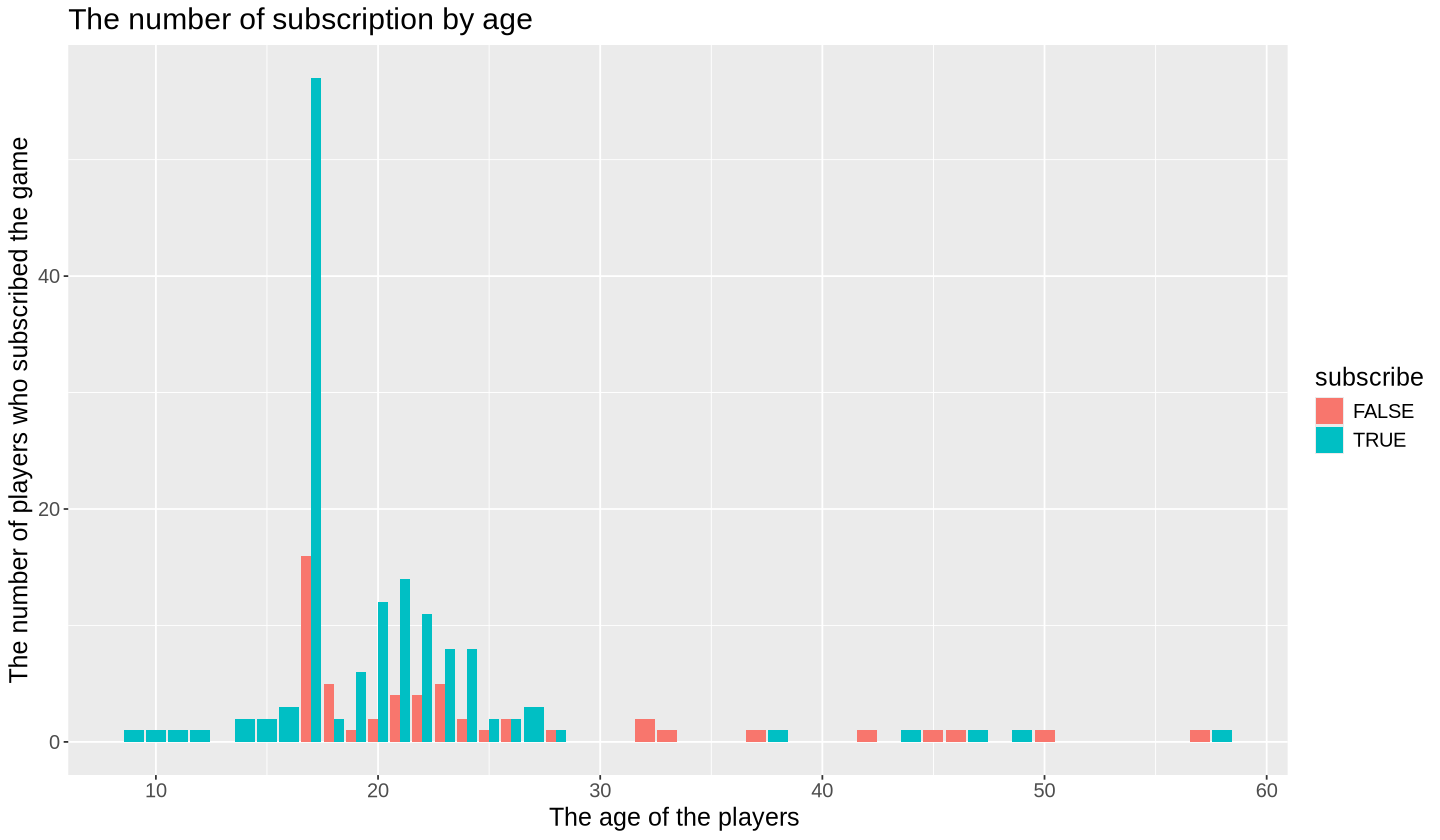

In [23]:
options(repr.plot.width=12, repr.plot.height=7)

players_plot_1 <- players_tidy |>
select(Age,subscribe)|>
ggplot(aes(x = Age, fill = subscribe)) + 
   geom_bar(position = "dodge") +
   scale_x_continuous(breaks = seq(0,60,by=10))+
   labs(x = "The age of the players " ,
        y = "The number of players who subscribed the game",
        title = "The number of subscription by age")+
   theme(text=element_text(size=15))

players_plot_1

This bar plot compares the subscription status of players across different ages. As for 17-year-old players, they have the highest number of both subscribed and non-subscribed players, representing by far the highest figures.

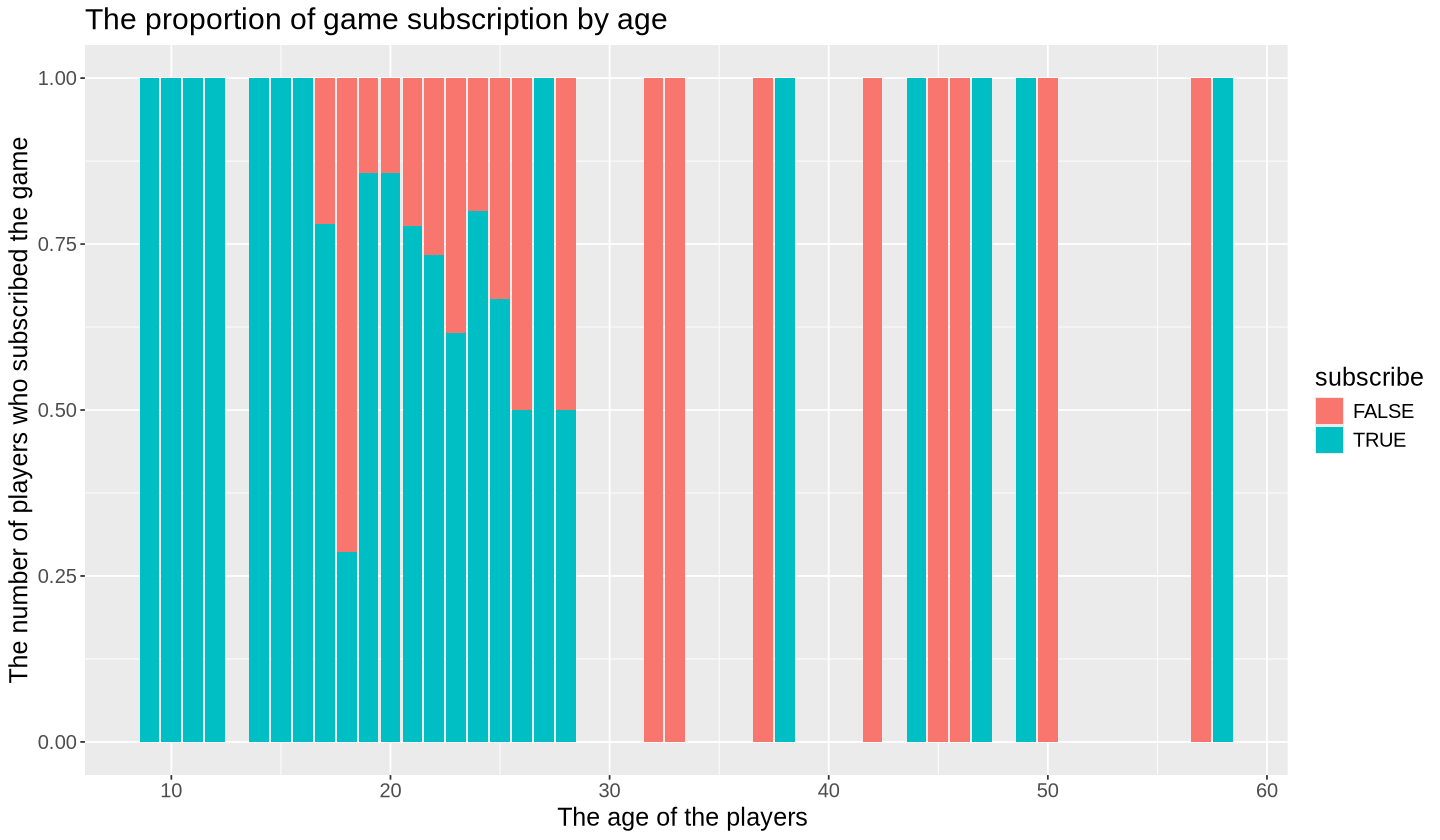

In [24]:
options(repr.plot.width=12, repr.plot.height=7)

players_plot_2 <- players_tidy |>
select(Age,subscribe)|>
ggplot(aes(x = Age, fill = subscribe)) + 
   geom_bar(position = "fill") +
   scale_x_continuous(breaks = seq(0,60,by=10))+
   labs(x = "The age of the players " ,
        y = "The number of players who subscribed the game",
        title = "The proportion of game subscription by age")+
   theme(text=element_text(size=15))

players_plot_2

This bar chart compares the proportion of players who subscribed across different age groups. It is clear that players around or under 15 years old all subscribed the game. For younger players (under 30), they are generally more likely to subscribe, but also a lot of them did not, especially those aged 18 that only has approximately 30% subscribed to the game. 

By contrast, players above 30 display a fairly balanced subscription patterns, with roughly equal subscribed and non-subscribed.

Overall, while younger players include many non-subscribers, they also make up the majority of the dataset, representing strong engagement potential.

## 4. Methods and Plan

1. The classification is appropriate because the response variable (subscribe) is a categorical type.
2. The K-nearest neighbors (KNN) algorithm can be used here because it can use data directly to form the class by measuring the proximity to neighboring points to determine the class of a new sample.
3. K-nearest neighbors (KNN) algorithm requires few assumptions about what the data must look like. It can essentially captures any kind of shape of data for a class.
4. the potential limitations or weaknesses of the method selected:
- becomes very slow as the training data gets larger
- may not perform well with a large number of predictors
- may not perform well when classes are imbalanced
  
5. I'm going to compare and select the model by cross-validation.
6. Once we have decided on a predictive question to answer and exploration is complete, the next step is to split the data into training data and testing data. I will use 75% of the data for training and 25% for testing.The subset of training data used for evaluation is the validation set.And then I will use it for cross-validation.

## 5. GitHub Repository

https://github.com/Chenwen-Zhang/individual-planning-report/tree/main